In [32]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,6)

# More Regression

We can now generate linear regression models that can predict a Y value when we supply an X value - cool! What about accuracy. How much can we trust these models to make accurate predictions? For regression we have two primary metrics of accuracy that we look at first - <b>RMSE and R2 (R squared)</b>. We can look at each individually, they are both pretty simple and easy to calculate. 

We'll load some data where there is more error than the NBA/NFL example from last time. 

In [33]:
#Load Data
df = pd.read_csv("../data/WalMartSales.csv")
df.head()

,﻿Store,FuelPrice,StoreSize,WeekAvgTemp,Unemployment,Sales,SalesPerSqFt
0,1.0,3.10,151315.0,47.0,7.43,22516.0,0.15
1,1.0,3.14,151315.0,42.0,7.43,22805.0,0.15
2,1.0,3.18,151315.0,51.0,7.43,22082.0,0.15
3,1.0,3.24,151315.0,55.0,7.43,19580.0,0.13
4,1.0,3.31,151315.0,54.0,7.43,21299.0,0.14


We can look at how accurately can we predict store sales at a WalMart, if we know the size of the store. 

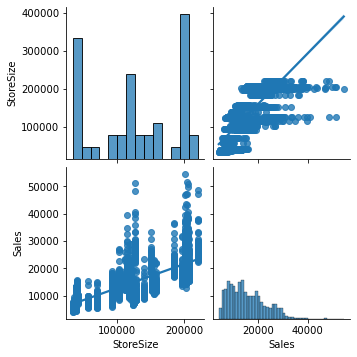

In [34]:
#We can take a preview
x1 = "StoreSize"
y1 = "Sales"
d = df[["StoreSize", "Sales"]]
sns.pairplot(d, kind="reg")

It appears that there is a relationship, though not a super strong one. Regression time...

In [35]:
#Do regression
inter, slope = thinkstats2.LeastSquares(d[x1],d[y1])
res = thinkstats2.Residuals(d[x1], d[y1], inter, slope)
regLine = thinkstats2.FitLine(d[x1], inter, slope)
print("Y intercept:", inter)
print("Slope:", slope)

Y intercept: 3894.199523404419
Slope: 0.0886042837694039


<AxesSubplot:xlabel='StoreSize', ylabel='Sales'>

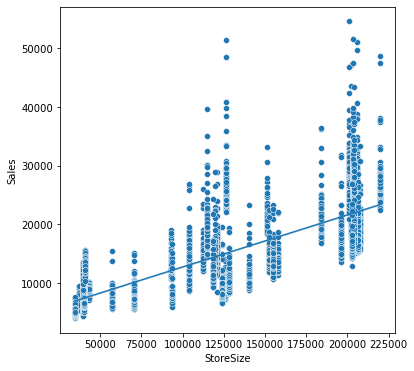

In [36]:
#Plot with regression line
sns.scatterplot(x=d[x1], y=d[y1])
sns.lineplot(x=regLine[0], y=regLine[1])

As a side observation, it looks like WalMart makes a lot of stores that are the same size. Someone might think about transforming the store size into a categorical value - for example, if each size of store is kind of a different "type", it might make sense. This type of decision would probably require both some knowledge of how the stores are setup and some trials to observe the results (this would presumably be when we were making a model with many inputs). 

<AxesSubplot:xlabel='StoreSize', ylabel='Sales'>

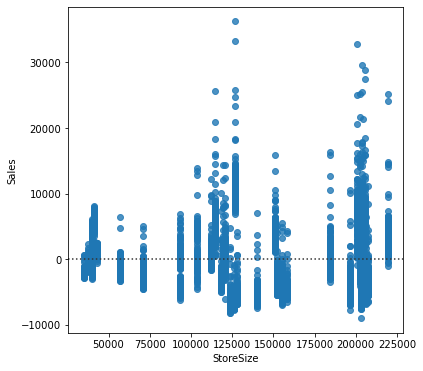

In [37]:
#Plot Residuals
sns.residplot(x=d[x1], y=d[y1])

### Results and Errors

Ok. We have a regression, it doesn't really look like it is the best one. Let's try to quantify how good it is.

## Error Metrics and MSE

We can plot and calculate our residuals, or the errors in each individual prediction, but we may have thousands or millions of predictions. We need to be able to summarize our errors in a single number. The first step in doing so is to calculate the Mean Squared Error (MSE), or to square all of the residuals and take the average.

In most cases, we use squaring when calculating our errors in regression. There are a few reasons for this:

- Simple: small errors are 'penalized' less than large errors when squaring. 

- Lazy: it is extremely common, well understood, and implemented all over the place. 

- Mathy: absolute value calculations generally suck when doing real math. Squaring gives the most 'efficient' estimation of errors - you need the smallest number of values to create an estimate, for math reasons we really don't care about: https://en.m.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem

We can calculate a common error metric, MSE - mean squared error. Which is just what it sounds like. 

![MSE](images/mse.png "MSE")

### RMSE

Similarly to how we often translate variance to standard deviation, we often translate MSE to RMSE. RMSE is in the "same terms" as the original data, we can think of it as rougly the expected amout of error in a typical prediction. For our purposes, going forward into machine learning, we are usually looking at error as our "score" - we want to create models that have less error, so their predictions are closer to reality, so we can rely on our predictions with more confidence. There are many different ways to calculate error, depending on what we are doing, but the idea of it being an evaluation of the quality of our model is the same in all cases. 

![RMSE](images/rmse.png "RMSE")

Lcukily, we don't need to do this by hand, there are existing functions that do it for us... First we can look at a simple example that breaks out all of the detals.

In [38]:
#Calculate RMSE from residuals
def rmseFromResiduals(residuals, root=True):
    SSE = 0
    for i in range(len(residuals)):
        SSE += (residuals[i]**2)
    MSE = SSE/len(residuals)
    if root==False:
        return MSE
    else:
        return math.sqrt(MSE)

In [39]:
rmseFromResiduals(res)

4681.2696710037135

### RMSE Results from Models

What if we are using one of the library functions? We can still calculate the RMSE, we just need to use the <b>mean_squared_error</b> function from the <b>sklearn.metrics</b> library.

In [40]:
x = np.array(d[x1]).reshape(-1,1)
y = np.array(d[y1]).reshape(-1,1)

reg_model = LinearRegression()
reg_model.fit(x,y)
reg_preds = reg_model.predict(x)
print(mean_squared_error(y, reg_preds, squared=False))

4681.269671003719


We can compare to our simple function above. 

In [41]:
#Or define a function to use what we made.
def rmseFromPredictions(real, predicted):
    return rmseFromResiduals(real-predicted)

In [42]:
rmseFromPredictions(y, reg_preds)

4681.269671003714

#### Results

RMSE is a major metric for the accuracy of our model, it tells us how close our predictions are. 

## Exercise - Predict Bodyfat from Knee Size

Now, you try one! Load some different data and get the RMSE. Try to do it two ways, one with a library function, and one with the RMSE calculation we made. Use the Knee value as the X and Bodyfat as the Y. Build a model to predict bodyfat from knee size. Calculate the RMSE for that model.

In [43]:
df_exercise = pd.read_csv("../data/bodyfat.csv")
df_exercise.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<AxesSubplot:xlabel='Knee', ylabel='BodyFat'>

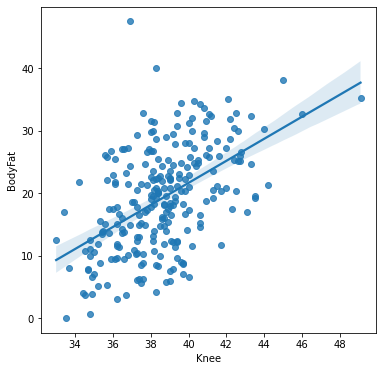

In [44]:
sns.regplot(data=df_exercise, x="Knee", y="BodyFat")

In [45]:
#Work exercise
#Do regression
de = df_exercise[["BodyFat","Knee"]]
xe = "Knee"
ye = "BodyFat"
interE, slopeE = thinkstats2.LeastSquares(de[xe],de[ye])
resE = thinkstats2.Residuals(de[xe], de[ye], interE, slopeE)
regLineE = thinkstats2.FitLine(de[xe], interE, slopeE)
print("Y intercept:", interE)
print("Slope:", slopeE)

Y intercept: -48.96223332015673
Slope: 1.7650216761968878


In [46]:
rmseFromResiduals(resE)

7.190877217783375

In [47]:
x2 = np.array(de[xe]).reshape(-1,1)
y2 = np.array(de[ye]).reshape(-1,1)

reg_model2 = LinearRegression()
reg_model2.fit(x2,y2)
reg_preds2 = reg_model2.predict(x2)
print(mean_squared_error(y2, reg_preds2, squared=False))

7.190877217783374


## R2 - Coefficient of Determination

One other metric that is important in evaluating our model is called R2 or R2 or the Coefficient of Determination. The definition of R2 is "the percentage of variation in the dependent or predicted variable (y) that can be explained by variation in the independent or explanatory variable (x)" - or roughly how much of the total picture our model captures. R2 values go up from 0 to 1 (you can get other values, but that's an indication the model is pretty useless. Only 0 to 1 matters in practice), and they are expressable as a percent. The R2 value is also called the "goodness of fit". 

For an example of what R2 means, think about a car stopping via its brakes. The R2 of brakes vs stopping distance might be .8 - or 80% of how long it takes you to stop is due to how hard you press the brake pedal. The other 20% is other stuff - tire grip on the road, tail/head wind, ABS modulation, etc... For the walmart one we are doing here, the R2 will tell us what percentage of sales are attributed to store size, and what percentage is due to other stuff - location, prices, products, staff, coupons, etc...

We can calculate this pretty simply - it is the ratio of the variance of the residuals to the varaiance of the y values in total. 

![R Squared](images/r_squared_form.jpg "R Squared")

We can think of it intuitively:
<ul>
<li> The data varries. Literally, the data points just have different values. 
<li> Our model captures <i>some</i> of that variation - specifically the part that <i>isn't</i> the residual. 
    <ul>
    <li> Recall - the residual is how <b>wrong</b> our model is, the "other part" is how <b>right</b> our model is, or the sum of squares of the regression. 
    </ul>
<li> The greater a percentage of the total variation is "in" our model, the better it fits - or the closer the pattern of the model's predictions are tailored to the real data. 
<li> The lower a percentage of the total variation is outside of our model, in our residuals, the less closely the model follows the data. 
<li><b> This percentage is R Sqaured - the coefficient of determination.</b>
</ul>

![R Squared](images/r_squared.jpg "R Squared")

### What Does R2 Tell Us?

R sqaured isn't directly a measure of error, though it is derived from the errors. R2 is a measure of how well suited the model we are using is for the data we are using it with (later in the machine learning stuff we'll look at visualizations of models that illustrate this a bit more clearly, we need some other stuff to get to that point though). High R2 tell us we are probably using a suitable model, low R2 tells us that we may want to make changess. It is also always on the same scale, so we can compare between models pretty easily. 

R2 doesn't tell us our accuracy like the RMSE does, as we don't get a direct measure of the error in predictions. Since they are both based on the error though, they will almost always move in concert with each other - as the error amounts drop, the R2 rises, and vice versa. 

<b>Note:</b> R squared is on a 0 to 1 scale. Sometimes calculations spit out an R2 that is negative. If this happens we don't really care about the value, it is an indication that the model is a terrible fit for the data, worse than if you were to just use a constant horizontal line as a model. E.g.:

![Negative R Squared](images/neg_r_squared.png "Negative R Squared")

### R2 Usage

R2 doesn't specifically tell us what the errors are in our model, but we still use it to evaluate model quality. R2 is a measure of how well our model fits the data, so a high R2 tells us the the error is low, and a low R2 tells us the error is high. It is very common to use R2 as a primary metric for model quality, the default for evaluating models in sklearn is often R2. R2 is somewhat more intuitive than RMSE, since the scale of the data can vary widely, while R2 is basically just a percentage grade like we're in grade 5 math class. 

The concept underlying R2 is one which will be very important in machine learning, we are looking to capture things that explain the variance of our target - the more of that variance we can capture, the better our model is. Or in layman's terms, we are looking for a model that captures the things that determine what our target value will be. 

In [48]:
def rSquared(yvals, residuals):
    return (1-(thinkstats2.Var(residuals)/thinkstats2.Var(yvals)))

It can also be expressed like this, this is the definition you get from Wikipedia. 

$ 1 - \frac{SS_{residual}}{SS_{total}} $

Where SS is the sum of squares.

In [49]:
def rSquared_2(yvals, residuals):
    RSS = 0
    TSS = 0
    ybar = yvals.mean()
    for i in range(len(residuals)):
        RSS += (residuals[i]**2)
        TSS += ((yvals[i]-ybar)**2)
    r2 = 1-(RSS/TSS)
    return r2

In [50]:
rSquared_2(d[y1], res)

0.5879595688548191

<b>As a fun note, this is equal to the Pearson correlation squared. </b>

In [51]:
1-thinkstats2.Corr(d[y1], res)**2

0.5879595688548198

Hopefully those two match what the statsmodels has above!!!!

#### Using Errors

These two values - RMSE and R2 - are the two primary (mostly - more on this later, along with R2 limitations) metrics that we can use to evaluate a model's accuracy and its predictive value. If we have a high R2 and a (comparatively) low RMSE, we are probably making reliable predictions. 

<b>Big Note:</b> our real life error calculation process will be slightly different from this - notably rather than calculating the error amounts from the model itself, we will calculate it based on some other, test, data. The errors themselves are the same, but we will split our data to make the error caclulations more robust. We'll look at this next time. 

## Exercise - Calculate R2

Calculate R2 for the bodyfat/knee example.

In [52]:
#R2 for the knee/bodfat
rSquared(de[ye], resE)

0.25874032931973145

## Exercise - End to End Regression

Now, load some other data and give it a try... 

Do a linear regression and calculate R2 and the RMSE for this data. Use head size to predict brain weight. It is pretty easy to measure the size of someone's dome, but pretty hard to weigh their brain. We want to see how accurately we can predict one from the other. Does the model look like we can trust it to make good predictions?  

X = Head Size

y = Brain Weight

In [53]:
df2 = pd.read_csv("../data/brain.csv")
df2.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


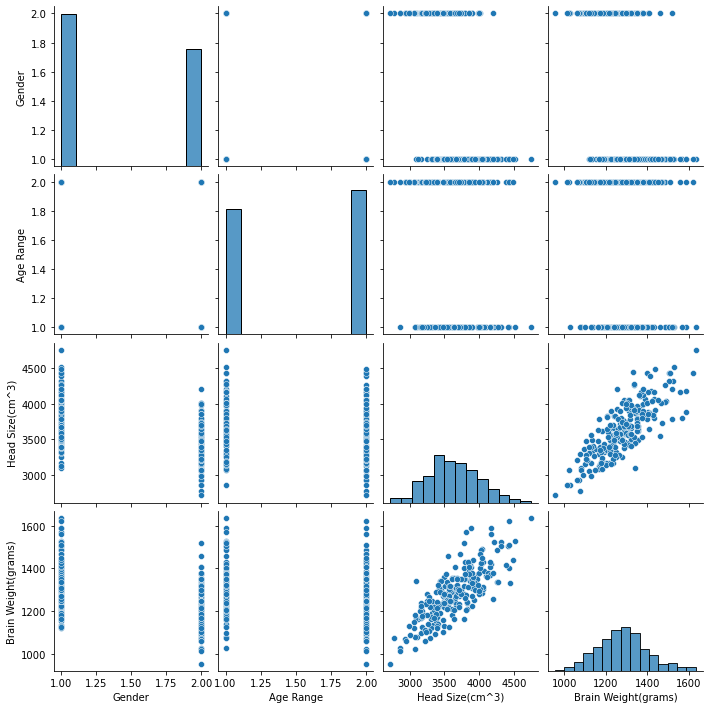

In [54]:
sns.pairplot(df2)

In [55]:
#Setup
d2 = df2[["Head Size(cm^3)", "Brain Weight(grams)"]]
d2 = d2.rename(columns={"Head Size(cm^3)":"X", "Brain Weight(grams)":"Y"})
x = "X"
y = "Y"
d2.head()

,X,Y
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [56]:
#Regression
inter2, slope2 = thinkstats2.LeastSquares(d2[x],d2[y])
res2 = thinkstats2.Residuals(d2[x], d2[y], inter2, slope2)
regLine2 = thinkstats2.FitLine(d2[x], inter2, slope2)
print("Y intercept:", inter2)
print("Slope:", slope2)

Y intercept: 325.5734210494428
Slope: 0.2634293394893993


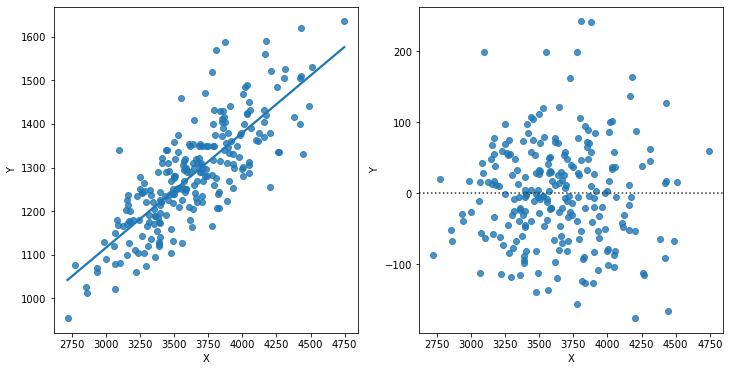

In [57]:
#plot
thinkplot.PrePlot(2,1,2)
sns.regplot(data=d2, x=d2[x], y=d2[y], ci=0)
thinkplot.SubPlot(2)
sns.residplot(data=d2, x=d2[x], y=d2[y])
thinkplot.Config()

In [58]:
#RMSE/R2
print("RMSE", rmseFromResiduals(res2))
print("R2", rSquared(d2[y], res2))

RMSE 72.1206213783709
R2 0.6393117199570002


In [59]:
#predict
print("Prediction:", slope2*4500+inter2)

Prediction: 1511.0054487517396


<b>You are now a machine learning professional. </b>